In [7]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
from dask_ml.model_selection import train_test_split
from dask.distributed import Client
import matplotlib.pyplot as plt
import xgboost as xgb
import math
import seaborn as sns
import argparse
import logging
import os
import csv

def plot_feature_score_histograms(features, inferred_network1, inferred_network2):
    print("\tPlotting feature score histograms")
    
    # Step 1: Convert only necessary columns to pandas
    if isinstance(inferred_network1, dd.DataFrame):
        print("\tConverting feature columns from Dask to pandas for plotting")
        inferred_network1 = inferred_network1[features].compute()
        
    # Step 1: Convert only necessary columns to pandas
    if isinstance(inferred_network2, dd.DataFrame):
        print("\tConverting feature columns from Dask to pandas for plotting")
        inferred_network2 = inferred_network2[features].compute()

    ncols = 4
    nrows = math.ceil(len(features) / ncols)

    plt.figure(figsize=(5 * ncols, 4 * nrows))

    for i, feature in enumerate(features, 1):
        plt.subplot(nrows, ncols, i)
        sns.histplot(inferred_network1[feature].dropna(), bins=50, alpha=0.7, color='#1682b1', edgecolor="#032b5f", stat='proportion')
        sns.histplot(inferred_network2[feature].dropna(), bins=50, alpha=0.7, color="#cb5f17", edgecolor="#b13301", stat='proportion')
        plt.title(f"{feature}", fontsize=14)
        plt.xlabel(feature, fontsize=14)
        plt.ylabel("Frequency", fontsize=14)
        plt.xlim((0, 1))
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()

In [2]:
def load_and_merge_score_datasets(output_dir):
    peak_to_gene_corr_df = pd.read_parquet(os.path.join(output_dir, "peak_to_gene_correlation.parquet"))
    cicero_score_df = pd.read_parquet(os.path.join(output_dir, "cicero_peak_to_tg_scores.parquet"))

    merged_df = pd.merge(peak_to_gene_corr_df, cicero_score_df, on=["peak_id", "target_id"], how="outer")

    return merged_df

In [3]:
ds011_output_dir = "/gpfs/Labs/Uzun/SCRIPTS/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/output/DS011_mESC/DS011_mESC_sample1"
mesc_output_dir = "/gpfs/Labs/Uzun/SCRIPTS/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/output/mESC/filtered_L2_E7.5_rep2"

In [4]:
ds011_df = load_and_merge_score_datasets(ds011_output_dir)

In [5]:
mesc_df = load_and_merge_score_datasets(mesc_output_dir)

	Plotting feature score histograms


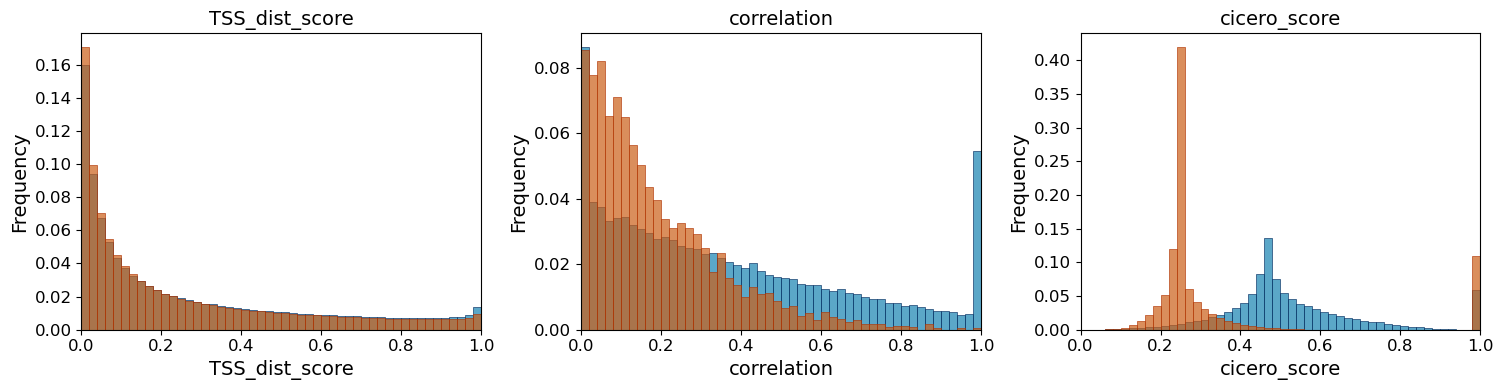

In [8]:
feature_names = ['TSS_dist_score', 'correlation', 'cicero_score']
plot_feature_score_histograms(feature_names, mesc_df, ds011_df)